# Introduction

Breast cancer (BC) is one of the most common cancers among women worldwide, representing the majority of new cancer cases and cancer-related deaths according to global statistics, making it a significant public health problem in today’s society.

The early diagnosis of BC can improve the prognosis and chance of survival significantly, as it can promote timely clinical treatment to patients. Further accurate classification of benign tumors can prevent patients undergoing unnecessary treatments. Thus, the correct diagnosis of BC and classification of patients into malignant or benign groups is the subject of much research. Because of its unique advantages in critical features detection from complex BC datasets, machine learning (ML) is widely recognized as the methodology of choice in BC pattern classification and forecast modelling.

In this tutorial, we will study breast cancer detection based on Decision Tree model from sklearn library. This aims to observe which features are most helpful in predicting malignant or benign cancer and to see general trends that may aid us in model selection and hyper parameter selection. The goal is to classify whether the breast cancer is benign or malignant. To achieve this i have used machine learning classification methods to fit a function that can predict the discrete class of new input. 

# Dataset

The dataset used in this story is publicly available and was created by Dr. William H. Wolberg, physician at the University Of Wisconsin Hospital at Madison, Wisconsin, USA. To create the dataset Dr. Wolberg used fluid samples, taken from patients with solid breast masses and an easy-to-use graphical computer program called Xcyt, which is capable of perform the analysis of cytological features based on a digital scan. The program uses a curve-fitting algorithm, to compute ten features from each one of the cells in the sample, than it calculates the mean value, extreme value and standard error of each feature for the image, returning a 30 real-valuated vector. The dataset can be found in https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

Attribute Information:


- ID number 
- Diagnosis (M = malignant, B = benign) 3–32)

3 - 32 Ten real-valued features are computed for each cell nucleus:

- radius (mean of distances from center to points on the perimeter)
- texture (standard deviation of gray-scale values)
- perimeter
- area
- smoothness (local variation in radius lengths)
- compactness (perimeter² / area — 1.0)
- concavity (severity of concave portions of the contour)
- concave points (number of concave portions of the contour)
- symmetry
- fractal dimension (“coastline approximation” — 1)

# Breast cancer detection from Decision Tree

## Data Retrieving

In [1]:
from sklearn.datasets import load_breast_cancer

breast_cancer_dataset = load_breast_cancer()

In [31]:
breast_cancer_dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [34]:
breast_cancer_dataset.target_names

array(['malignant', 'benign'], dtype='<U9')

In [36]:
breast_cancer_dataset.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

## Data Exploration

In [3]:
breast_cancer_dataset.target_names

array(['malignant', 'benign'], dtype='<U9')

In [4]:
breast_cancer_dataset.data.shape

(569, 30)

In [5]:
breast_cancer_dataset.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [6]:
breast_cancer_dataset.target.shape

(569,)

## Split these feature vectors into a trainning and testing sets

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(breast_cancer_dataset.data, breast_cancer_dataset.target, test_size = 0.2, random_state = 42)

In [8]:
X_train.shape

(455, 30)

In [9]:
X_test.shape

(114, 30)

In [10]:
y_train.shape

(455,)

In [11]:
y_test.shape

(114,)

## Build a Decision Tree model

In [12]:
#--- Train with Decision Tree ---#
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

## Training the model and make a prediction

In [13]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [14]:
y_pred= model.predict(X_test)

## Evaluate the model

In [15]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [16]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred, average = 'weighted'))
print("Recall:",metrics.recall_score(y_test, y_pred, average = 'weighted'))
print("F1-score:",metrics.f1_score(y_test, y_pred, average = 'weighted'))

Accuracy: 0.9385964912280702
Precision: 0.938457254246728
Recall: 0.9385964912280702
F1-score: 0.9384499917007656


In [17]:
report = classification_report(y_test, y_pred, target_names = breast_cancer_dataset.target_names)

In [18]:
print(report)

              precision    recall  f1-score   support

   malignant       0.93      0.91      0.92        43
      benign       0.94      0.96      0.95        71

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



## Parameter Tunning

In [19]:
from sklearn.model_selection import GridSearchCV

In [20]:
model = DecisionTreeClassifier()

**Parameters setting**

In [21]:
params = {'criterion': ['gini', 'entropy'], 'max_depth': range(1,10)}

**Running the Grid Search on parameters and fit the trainning data**

In [22]:
# 10-fold
#grs = GridSearchCV(model, param_grid=params, cv = 10)

# 5-fold default
grs = GridSearchCV(model, param_grid=params)

In [23]:
grs.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10)})

**Output the optimal values**

In [24]:
print("Best Hyper Parameters:",grs.best_params_)

Best Hyper Parameters: {'criterion': 'entropy', 'max_depth': 5}


**A question: can you explain why a maximum depth is different for different runs?**

**Make a prediction and calculate metrics**

In [25]:
model = grs.best_estimator_
y_pred=model.predict(X_test)

**Evaluate the model**

In [26]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred, average = 'weighted'))
print("Recall:",metrics.recall_score(y_test, y_pred, average = 'weighted'))
print("F1-score:",metrics.f1_score(y_test, y_pred, average = 'weighted'))

Accuracy: 0.9473684210526315
Precision: 0.9488079172289698
Recall: 0.9473684210526315
F1-score: 0.9468057045386604


## Visualization the Tree 

In [27]:
#model = grs.best_estimator_

In [28]:
#model.fit(X_train, y_train)

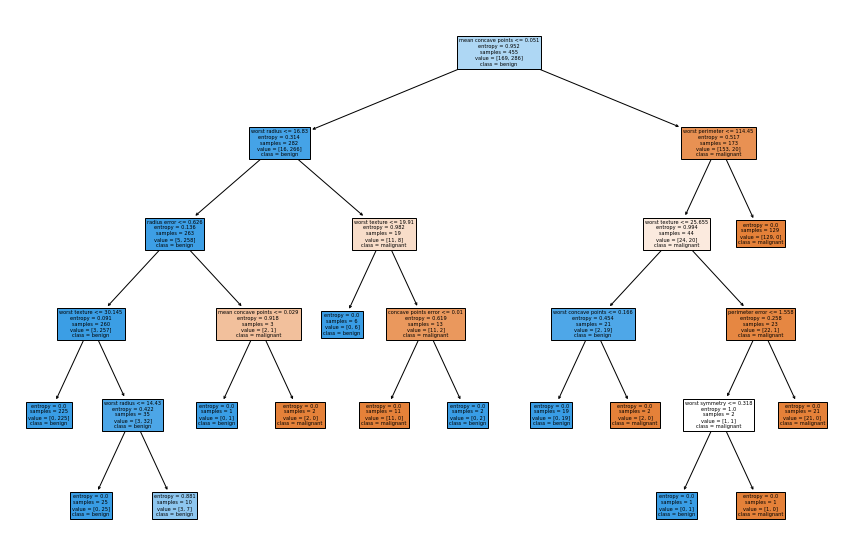

In [29]:
from matplotlib import pyplot as plt
from sklearn import tree

fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(model, 
                   filled=True,
                   feature_names=breast_cancer_dataset.feature_names,  
                   class_names=breast_cancer_dataset.target_names)